**Kelompok C22 - 167**


1.   Ahmad Hidayat - M318X0850
2.   Ahmad Rijal - M211X0421
3.   Meilia Tri Andari - M004Y0009
4.   Nia Famela Simanjuntak - M302Y0795



Project Self Checking Cleaner Street 

# Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Preprocessing

In [3]:
TRAINING_DIR = "/content/drive/MyDrive//Colab Notebooks/DATASET/Garbage/training"
VALIDATION_DIR = "/content/drive/MyDrive//Colab Notebooks/DATASET/Garbage/validation"

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))

Found 2226 images belonging to 2 classes.


In [6]:
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))

Found 1204 images belonging to 2 classes.


# Modelling

In [7]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(224, 224, 3)))

for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output

9406464/9406464 [==============================] - 0s 0us/step


In [8]:
x = tf.keras.layers.AveragePooling2D(pool_size=(7, 7))(last_output)
x = tf.keras.layers.Flatten(name="flatten")(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(2, activation="softmax")(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [9]:
int_lr = 1e-4
num_epochs = 20

optimizer = tf.optimizers.Adam(learning_rate=int_lr, decay=int_lr/num_epochs)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Training

In [10]:
H = model.fit(train_generator,
              steps_per_epoch=20,
              epochs=num_epochs,
              validation_data=validation_generator,
              validation_steps=3)

Epoch 1/20
20/20 [==============================] - 106s 5s/step - loss: 0.8661 - accuracy: 0.5078 - val_loss: 0.6205 - val_accuracy: 0.7333
Epoch 2/20
20/20 [==============================] - 74s 4s/step - loss: 0.7062 - accuracy: 0.6000 - val_loss: 0.5816 - val_accuracy: 0.7000
Epoch 3/20
20/20 [==============================] - 63s 3s/step - loss: 0.6704 - accuracy: 0.6278 - val_loss: 0.4032 - val_accuracy: 0.8667
Epoch 4/20
20/20 [==============================] - 57s 3s/step - loss: 0.6266 - accuracy: 0.6821 - val_loss: 0.4755 - val_accuracy: 0.8333
Epoch 5/20
20/20 [==============================] - 47s 2s/step - loss: 0.6250 - accuracy: 0.6725 - val_loss: 0.4908 - val_accuracy: 0.9667
Epoch 6/20
20/20 [==============================] - 45s 2s/step - loss: 0.6315 - accuracy: 0.6547 - val_loss: 0.4750 - val_accuracy: 0.8667
Epoch 7/20
20/20 [==============================] - 44s 2s/step - loss: 0.6050 - accuracy: 0.6656 - val_loss: 0.4575 - val_accuracy: 0.8667
Epoch 8/20
20/20 [=

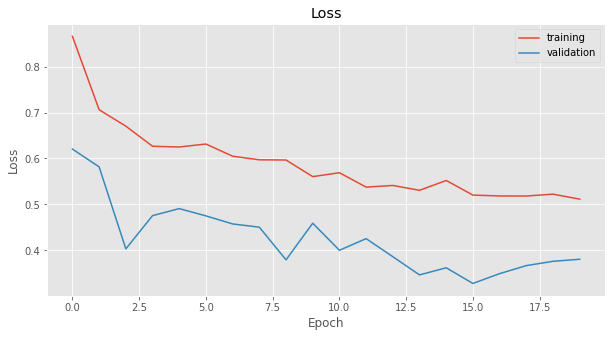

In [11]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

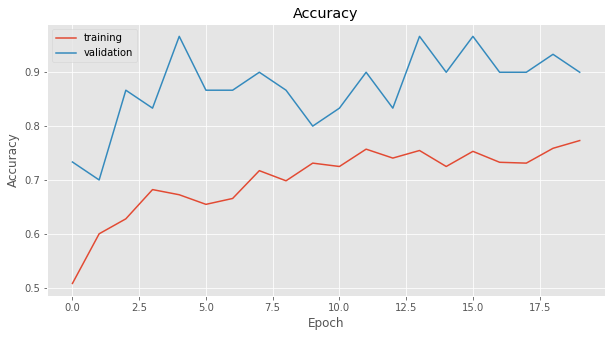

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [14]:
import os
clean = os.path.join('/content/drive/MyDrive//Colab Notebooks/DATASET/Garbage/training/clean')
dirty = os.path.join('/content/drive/MyDrive//Colab Notebooks/DATASET/Garbage/training/dirty')
print('Jumlah dataset clean: ', len(os.listdir(clean)))
print('Jumlah dataset dirty: ', len(os.listdir(dirty)))

Jumlah dataset clean:  1207
Jumlah dataset dirty:  1019


Saving 00037_04.jpg to 00037_04.jpg
1/1 [==============================] - 0s 69ms/step
00037_04.jpg
Lingkungan Masih Kotor. Perlu dibersihkan lagi!!


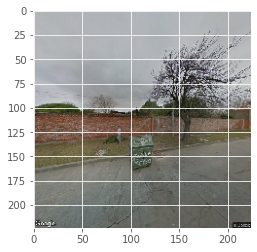

In [24]:
import numpy as np
from google.colab import files
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
import pathlib
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=5)  
  print(fn)
  if classes[0][0]==1:
    print('Lingkungan Sudah Bersih')
  else:
      print('Lingkungan Masih Kotor. Perlu dibersihkan lagi!!')